## MLP(Multi Layer Perceptron)

여러 개의 퍼셉트론 뉴런을 여러 층으로 쌓은 다층신경망 구조로 입력층과 출력층 사이에 하나 이상의 은닉층을 가지고 있는 신경망을 의미한다.

In [13]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch import nn
from torch import optim
from torchvision import utils
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision import datasets
from torchvision.transforms import transforms

In [14]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [15]:
# transforms = transforms.Compose([transforms.Resize((32,32)), # LeNet input size = 32x32
#                                  transforms.ToTensor()])
train_dataset = datasets.MNIST(root='mnist_data', train=True, transform=transforms.ToTensor(), download=True)
valid_dataset = datasets.MNIST(root='mnist_data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=64, shuffle=False)

In [31]:
class simpleMlp(nn.Module):
  def __init__(self):
    super(simpleMlp, self).__init__()
    self.fc1 = nn.Linear(28*28, 50).to(device)
    
  def forward(self, x):
    out = self.fc1(x)
    
    return out


class simpleMlp2(nn.Module):
  def __init__(self):
    super(simpleMlp2, self).__init__()
    self.fc1 = nn.Linear(28*28, 50).to(device)
    self.fc2 = nn.Linear(50, 10).to(device)
  def forward(self, x):
    out = self.fc1(x)
    out = self.fc2(out)
    out = F.relu(out)
    return out

class simpleMlp3(nn.Module):
  def __init__(self):
    super(simpleMlp3, self).__init__()
    self.fc1 = nn.Linear(28*28, 14*14).to(device)
    self.fc2 = nn.Linear(14*14, 7*7).to(device)
    self.fc3 = nn.Linear(7*7, 10).to(device)
  def forward(self, x):
    out = self.fc1(x)
    out = F.relu(out)
    out = self.fc2(out)
    out = F.relu(out)
    out = self.fc3(out)
    out = F.relu(out)
    return out


def plot_losses(train_losses, valid_losses):
    plt.style.use('seaborn')
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    plt.style.use('default')

In [32]:
model = simpleMlp3()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss().to(device)

In [33]:
epochs = 40
train_losses = []
valid_losses = []
for epoch in range(epochs):
  train_loss = 0
  for X, Y in train_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    H = model(X)
    cost = criterion(H, Y)
    cost.backward()
    optimizer.step()

    train_loss += cost.item()
  train_losses.append(train_loss/len(train_loader))

  with torch.no_grad():
    valid_loss = 0

    for X, Y in valid_loader: 
      X = X.view(-1, 28*28).to(device)
      Y = Y.to(device)
      H = model(X)

      cost = criterion(H, Y)
      valid_loss += cost.item()

      #correct_prediction = torch.argmax(H, 1) == Y 
      #acc = correct_prediction.float().mean()
    valid_losses.append(valid_loss/len(valid_loader))

  print(f'Epoch:{epoch + 1}\t' f'train loss:{train_loss/len(train_loader):.4f}\t' f'valid loss:{valid_loss/len(valid_loader):.4f}')

Epoch:1	train loss:2.2967	valid loss:2.2898
Epoch:2	train loss:2.2816	valid loss:2.2719
Epoch:3	train loss:2.2608	valid loss:2.2472
Epoch:4	train loss:2.2318	valid loss:2.2130
Epoch:5	train loss:2.1922	valid loss:2.1670
Epoch:6	train loss:2.1401	valid loss:2.1093
Epoch:7	train loss:2.0775	valid loss:2.0429
Epoch:8	train loss:2.0089	valid loss:1.9749
Epoch:9	train loss:1.9426	valid loss:1.9113
Epoch:10	train loss:1.8797	valid loss:1.8461
Epoch:11	train loss:1.8072	valid loss:1.7740
Epoch:12	train loss:1.7378	valid loss:1.7059
Epoch:13	train loss:1.6693	valid loss:1.6364
Epoch:14	train loss:1.6022	valid loss:1.5718
Epoch:15	train loss:1.5443	valid loss:1.5186
Epoch:16	train loss:1.4980	valid loss:1.4759
Epoch:17	train loss:1.4605	valid loss:1.4410
Epoch:18	train loss:1.4296	valid loss:1.4118
Epoch:19	train loss:1.4033	valid loss:1.3870
Epoch:20	train loss:1.3812	valid loss:1.3660
Epoch:21	train loss:1.3617	valid loss:1.3474
Epoch:22	train loss:1.3449	valid loss:1.3310
Epoch:23	train loss

# model1 test

accuracy: 0.8946999907493591


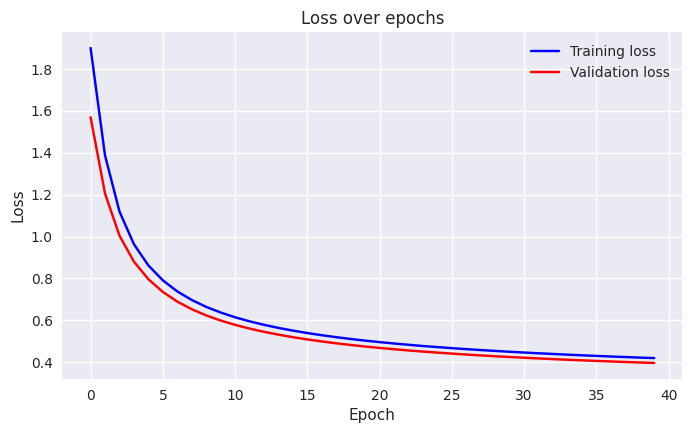

In [19]:
plot_losses(train_losses, valid_losses)

with torch.no_grad(): #test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.
    X_test = valid_dataset.data.view(-1, 28 * 28).float().to(device)
    Y_test = valid_dataset.targets.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test #결과값이랑 실제값이랑 같은지 확인
    accuracy = correct_prediction.float().mean() #평균으로 전체 정확도 확인
    print('accuracy:', accuracy.item())

# model2 test

accuracy: 0.9014999866485596


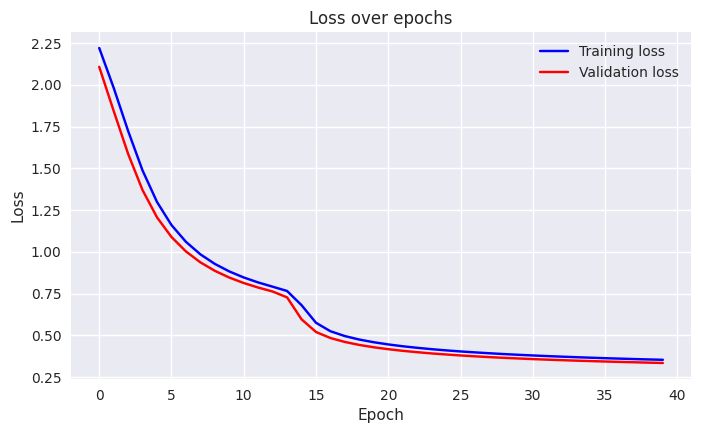

In [30]:
plot_losses(train_losses, valid_losses)

with torch.no_grad(): #test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.
    X_test = valid_dataset.data.view(-1, 28 * 28).float().to(device)
    Y_test = valid_dataset.targets.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test #결과값이랑 실제값이랑 같은지 확인
    accuracy = correct_prediction.float().mean() #평균으로 전체 정확도 확인
    print('accuracy:', accuracy.item())

# model3 test

accuracy: 0.545199990272522


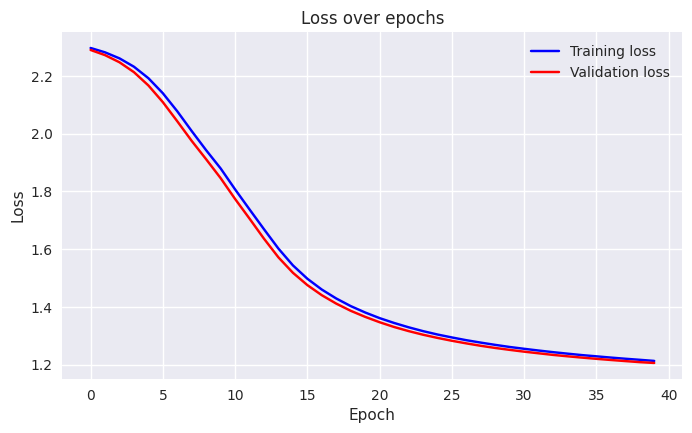

In [36]:
plot_losses(train_losses, valid_losses)

with torch.no_grad(): #test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.
    X_test = valid_dataset.data.view(-1, 28 * 28).float().to(device)
    Y_test = valid_dataset.targets.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test #결과값이랑 실제값이랑 같은지 확인
    accuracy = correct_prediction.float().mean() #평균으로 전체 정확도 확인
    print('accuracy:', accuracy.item())